<a href="https://colab.research.google.com/github/Philliec459/Open-Source-Petrophysics/blob/main/Panel_Bvocc_ver5_GitHub_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
using_colab = True

In [2]:
if using_colab:

    !wget 'https://github.com/Philliec459/Open-Source-Petrophysics/raw/main/Thomeer_spreadsheet_Clerke.xlsx'
    #!wget 'https://github.com/Philliec459/Open-Source-Petrophysics/raw/main/photos.ZIP'

    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/STELLA_brief_ver2_backyard_grass_shoreline.ipynb
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_grass_shade_whiteshade.xlsx
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_FullSun.xlsx

    #!pip install altair
    #!pip install panel
    #!pip install pillow
    #!pip install jupyter_bokeh
    #!pip install altair_viewer
    #!pip install altair_transform
    !pip install scipy

    #!unzip photos


--2024-08-30 13:18:34--  https://github.com/Philliec459/Open-Source-Petrophysics/raw/main/Thomeer_spreadsheet_Clerke.xlsx
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Philliec459/Open-Source-Petrophysics/main/Thomeer_spreadsheet_Clerke.xlsx [following]
--2024-08-30 13:18:35--  https://raw.githubusercontent.com/Philliec459/Open-Source-Petrophysics/main/Thomeer_spreadsheet_Clerke.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 900822 (880K) [application/octet-stream]
Saving to: ‘Thomeer_spreadsheet_Clerke.xlsx’

Thomeer_spreadsheet 100%[===================>] 879.71K  --.-KB/s    in 0.0

# Gaussian Fit of HPMI data

## Load Python libraries

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import panel as pn
#pn.extension('matplotlib')
#pn.extension()


pn.extension(comms='colab')

from scipy.optimize import minimize




## Define Functions:

In [4]:
# Plot data
def plot_hpmi():
    x_values = np.flipud((2*367)/(Pc*69035)*10**4)

    ###print(np.cumsum(dbvocc))

    # Plot the log-normal distribution
    plt.figure(figsize=(6, 6))
    plt.plot(BVocc,Pc, 'b-', label='BVocc from Sw')
    #plt.plot(Bvocc, Pc, 'r-', label='Bvocc from Spreadsheet')
    #plt.plot(x_values, log_normal_total_distribution, 'k-', label='Log-Normal Distribution')

    # Set the x-axis to a logarithmic scale (base 10)
    plt.yscale('log')
    plt.xlim(30,0)
    plt.title('Pc vs BVocc')
    plt.ylabel('Pc (log scale)')
    plt.xlabel('BVocc')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()


# Calculate the PDF normalization parameter mul
def mul():
    w1       =  1
    mu1      = np.log(10)
    mu2      = np.log(1)
    sigma1   = 1
    sigma2   = 1


    ## x_values are from 212 to 0.5, so x_values were flipped so now between 0.5 and 212#
    #BV2 = np.max(BVocc)/scale - BV1
    w2 = 1- w1

    # Generate x-values on a log scale (must be positive)
    #x_values = np.logspace(-2, 3, 100)
    x_values = np.flipud((2*367)/(Pc*69035)*10**4)

    #print('x_values',x_values)                # High to low from any Pc values
    #print('len(x_values)',len(x_values) )





    ## PDF is a lognormal distribution function based on Gaussian parameters:

    '''
      PDF is a distribution
    '''
    # Calculate the PDF for log-normal distribution 1
    pdf1 = w1 * (1 / (sigma1 * np.sqrt(2 * np.pi))) * \
           np.exp(- (np.log(x_values) - mu1)**2 / (2 * sigma1**2))

    # Calculate the PDF for log-normal distribution 2
    pdf2 = w2 * (1 / (sigma2 * np.sqrt(2 * np.pi))) * \
           np.exp(- (np.log(x_values) - mu2)**2 / (2 * sigma2**2))


    # Combine PDFs
    combined_pdf = (pdf1 + pdf2)
    #print('combined_pdf',combined_pdf)





    ## Cum Sum of the combined_pdf distribution to create BV_new. Check the max value of this pdf:
    BV_new = np.cumsum(np.flipud(combined_pdf))

    #print(('len ot BV_new',len(BV_new), 'BV_new',BV_new))
    #print()
    #print(('len of BVocc', len(BVocc), 'BVocc',BVocc))



    ## The Max of BVocc is porosity or 26.15 in this instance. The max of test is around 9.
    print()
    print('Max of BVocc', np.max(BVocc))
    print('Max of BV_new',np.max(BV_new))

    mul = np.max(BVocc)/np.max(BV_new)

    print('mul = max BVocc / max BV_new =',mul)

    return mul






# Load Data

HPMI Data from Ed Clerke Thomeer type Spreadsheet that he gives out.



In [5]:

# Specify the file path and sheet number
file_path = 'Thomeer_spreadsheet_Clerke.xlsx'
sheet_number = 0  # Replace with the index of your desired sheet (e.g., 0 for the first sheet)

# Read the specific range from the sheet
data = pd.read_excel(file_path, sheet_name=sheet_number, usecols="A:B", skiprows=7, nrows=106)

# Rename the columns to something meaningful
data.columns = ['Pc', 'BVocc']

# Display the data
print(data)

Pc     = np.array(data['Pc'])
BVocc  = np.array(data['BVocc'])

dbvocc = np.diff(BVocc)          # diff of BVocc for distribution, but loose one element in the array
dbvocc = np.insert(dbvocc,0,0)   # Our final dbvocc after adding a zero at the end.
print(len(dbvocc))



# Read Porosity for the current sample
porosity = pd.read_excel(file_path, sheet_name=sheet_number, usecols="B", skiprows=3, nrows=1).iloc[0, 0]

# Read Permeability for the current sample
permeability = pd.read_excel(file_path, sheet_name=sheet_number, usecols="B", skiprows=4, nrows=1).iloc[0, 0]

# Read Sample Number for the current sample
sample_no = pd.read_excel(file_path, sheet_name=sheet_number, usecols="B", skiprows=1, nrows=1).iloc[0, 0]

# Read Permeability for the current sample
closure_pick = pd.read_excel(file_path, sheet_name=sheet_number, usecols="D", skiprows=2, nrows=1).iloc[0, 0]

# Display the data
print('Porosity =', porosity,', Permeability =' , permeability , ', Sample_no =', sample_no, ', Closure Correction SCAL =' ,  closure_pick, 'pu')


               Pc      BVocc
0        0.560000   0.002215
1        0.630000   0.057355
2        0.710000   0.143127
3        0.800000   0.243194
4        0.900000   0.329696
..            ...        ...
101  32434.800781  26.072508
102  36141.058594  26.101098
103  40270.828125  26.141088
104  44872.500000  26.178972
105  50000.000000  26.228513

[106 rows x 2 columns]
106
Porosity = 0.24239233985953867 , Permeability = 168 , Sample_no = Sample 1 , Closure Correction SCAL = 1.6 pu


## Plot HPMI Data first to determine Number of Pore systems:

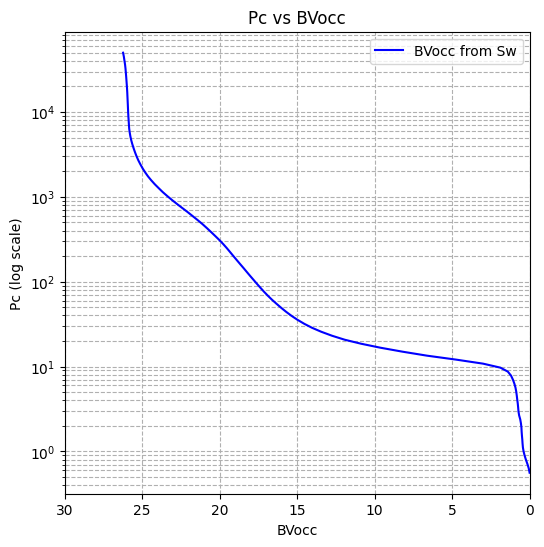

In [6]:
plot_hpmi()

## Determine maximum of PDF and normalie with Multiplicative factor

### The Max of BVocc is porosity or 26.15 in this instance. The max of test is around 9.

How do we rescale BVocc to be at the same scale as BVocc

The multiplier is:

        mul = Max of BVocc / Max of test

A retression plot between sample Porosity vs. mul, that mul can be calulated using the following equation:

        mul = 0.0924 * porosity + 0.0002

where the regression had a r2 of 1.00.  This 'mul' is fundamental, but what does it mean.

This regression might be related to data bias where each job needs to establish their own mu equation.

In [7]:
mul=mul()

#mul = 0.0924 * porosity + 0.0002


Max of BVocc 26.228513309176144
Max of BV_new 9.226064250697329
mul = max BVocc / max BV_new = 2.8428713042176925


# **How Many Pore Systems**?

In [8]:
#pore_systems = 1
pore_systems = 2

# Optimization 2:

Optimized parameters: w1=0.439, mu1=1.92, mu2=-0.52, sigma1=0.33, sigma2=2.16


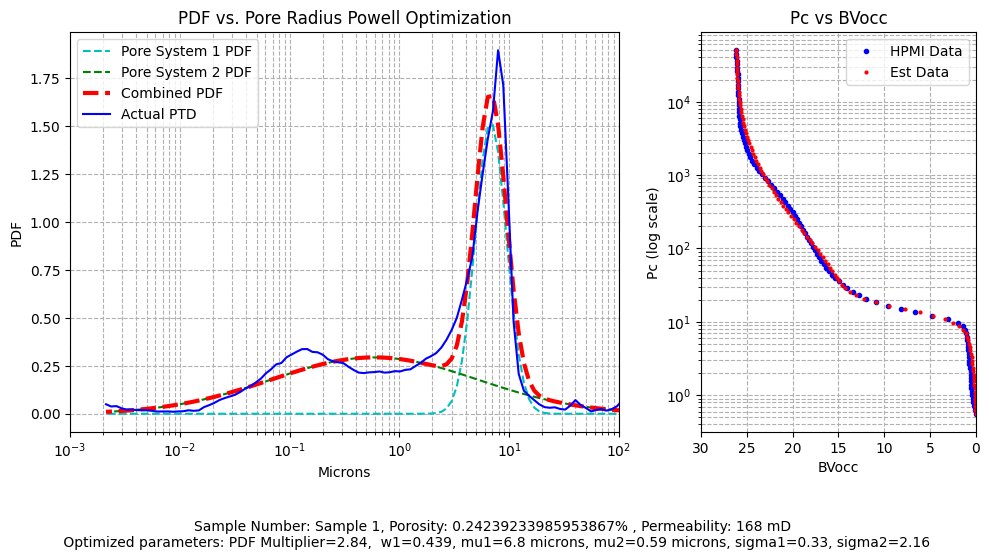

In [9]:
# Model function
def model_function(w1, mu1, mu2, sigma1, sigma2):

    if pore_systems == 2:
        w2 = 1 - w1
    else:
        w1=1
        w2=0

    # Generate x-values for pore throat radii on a log scale
    x_values = ((2 * 367) / (Pc * 69035) * 10**4)

    # Calculate the PDFs for log-normal distributions
    pdf1 = mul * w1 * (1 / (sigma1 * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x_values) - mu1)**2 / (2 * sigma1**2))
    pdf2 = mul * w2 * (1 / (sigma2 * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x_values) - mu2)**2 / (2 * sigma2**2))

    # Combine PDFs
    combined_pdf = pdf1 + pdf2

    # Sum up this distribution for a Pc curve
    BV_new = np.cumsum(combined_pdf)

    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [2, 1]})

    # Plot PDF with reversed axes
    ax1.plot(x_values, pdf1, 'c--', label='Pore System 1 PDF')
    ax1.plot(x_values, pdf2, 'g--', label='Pore System 2 PDF')
    ax1.plot(x_values, combined_pdf, 'r--', label='Combined PDF', lw=3)
    ax1.plot(x_values, dbvocc, 'b-', label='Actual PTD')
    ax1.set_yscale('linear')
    ax1.set_xscale('log')
    ax1.set_xlim(0.001, 100)
    ax1.set_xlabel('Microns')
    ax1.set_ylabel('PDF')
    ax1.set_title('PDF vs. Pore Radius Powell Optimization')
    ax1.grid(True, which="both", ls="--")
    ax1.legend()

    # Add the text below the plot
    text_string = (f'Sample Number: {sample_no}, Porosity: {porosity}% ,'
                   f' Permeability: {permeability} mD \n '
                   f'Optimized parameters: PDF Multiplier={round(mul, 2)},  w1={round(w1_opt, 3)}, '
                   f'mu1={round(np.exp(mu1_opt), 2)} microns, mu2={round(np.exp(mu2_opt), 2)} microns, '
                   f'sigma1={round(sigma1_opt, 2)}, sigma2={round(sigma2_opt, 2)}')

    # Adjust the position of the text as needed
    plt.figtext(0.5, -0.1, text_string, ha="center", fontsize=10, wrap=True)




    # Plot the actual data with markers only
    ax2.semilogy(BVocc, Pc, 'bo', markersize=3, label='HPMI Data')
    ax2.semilogy(BV_new, Pc, 'ro', markersize=2, label='Est Data')
    ax2.set_yscale('log')
    ax2.set_xlim(30, 0)
    ax2.set_title('Pc vs BVocc')
    ax2.set_ylabel('Pc (log scale)')
    ax2.set_xlabel('BVocc')
    ax2.grid(True, which="both", ls="--")
    ax2.legend()


    '''
    # Define the subdirectory where you want to save the plots
    output_dir = 'Plots'
    os.makedirs(output_dir, exist_ok=True)

    # Save the plot with a custom filename in the Plots subdirectory
    filename = os.path.join(output_dir, f'Plot_Pc_Batch{Pc_batch}_{Sample}_Optimize_Method2.png')
    plt.savefig(filename, bbox_inches='tight')
     '''



    plt.tight_layout()
    # Display the plot
    plt.show()

    return fig



# Objective function for optimization
def objective_function(params, Pc, BVocc, dbvocc):
    w1, mu1, mu2, sigma1, sigma2 = params


    if pore_systems == 2:
        w2 = 1 - w1
    else:
        w1=1
        w2=0

    x_values = ((2 * 367) / (Pc * 69035) * 10**4)

    pdf1 = mul * w1 * (1 / (sigma1 * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x_values) - mu1)**2 / (2 * sigma1**2))
    pdf2 = mul * w2 * (1 / (sigma2 * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x_values) - mu2)**2 / (2 * sigma2**2))

    combined_pdf = pdf1 + pdf2
    BV_new = np.cumsum(combined_pdf)

    # Normalize the BVocc and BV_new to avoid scale issues
    BVocc_normalized = BVocc / np.max(BVocc)
    BV_new_normalized = BV_new / np.max(BV_new)

    # Calculate the error (mean squared error) between the actual and estimated data
    error = np.mean((BVocc_normalized - BV_new_normalized)**2)

    return error

# Initial guess for optimization
initial_guess = [0.7, np.log(6), np.log(0.1), 0.9, 0.7]  # w1, mu1, mu2, sigma1, sigma2

# Define bounds for each parameter
bounds = [
    (0, 1),          # w1
    (-3, 6),         # mu1
    (-3, 6),         # mu2
    (0.1, 4),        # sigma1
    (0.1, 4)         # sigma2
]

# Perform the optimization with Powell method (you can try others)
result = minimize(objective_function, initial_guess, args=(Pc, BVocc, dbvocc),
                  method='Powell', bounds=bounds)

# Extract optimized parameters
optimized_params = result.x
w1_opt, mu1_opt, mu2_opt, sigma1_opt, sigma2_opt = optimized_params

print(f"Optimized parameters: w1={round(w1_opt,3)}, mu1={round(mu1_opt,2)}, mu2={round(mu2_opt,2)}, sigma1={round(sigma1_opt,2)}, sigma2={round(sigma2_opt,2)}")

# Use optimized parameters to generate the final plot
fig = model_function(w1_opt, mu1_opt, mu2_opt, sigma1_opt, sigma2_opt)


# Try to refine Gaussian fitting parameters using slide bars:

Row
    [0] Column
        [0] FloatSlider(name='w1', step=0.01, value=0.4392552749577941)
        [1] FloatSlider(end=6, name='mu1', start=-3, value=1.9170222963147054)
        [2] FloatSlider(end=6, name='mu2', start=-3, value=-0.5230396675079956)
        [3] FloatSlider(end=4, name='sigma1', start=0.1, value=0.3277615508047636)
        [4] FloatSlider(end=4, name='sigma2', start=0.1, value=2.1632866289068473)
    [1] ParamFunction(function, _pane=Matplotlib, defer_load=False)
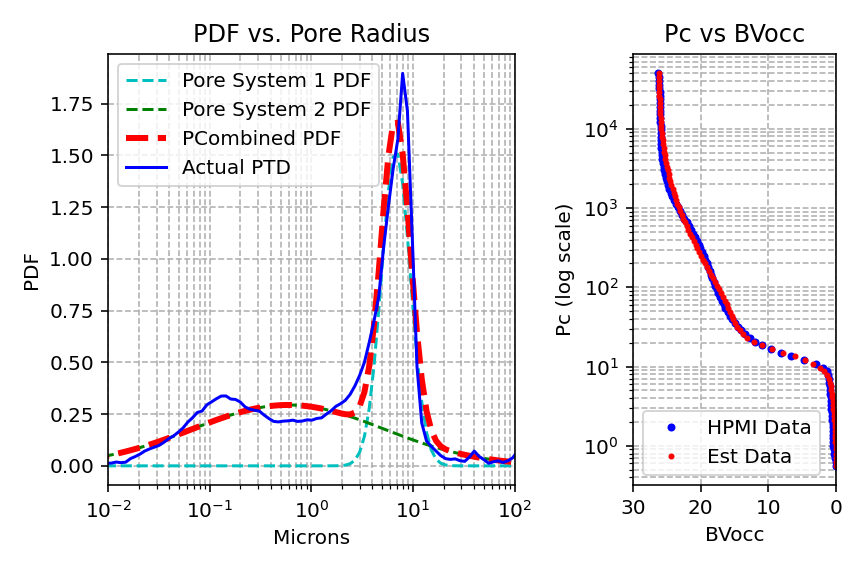

In [10]:
# No **flipud** in this code:
# Model function

def model_function(w1, mu1, mu2, sigma1, sigma2):

    #BV2 = np.max(BVocc)/scale - BV1
    w2 = 1- w1

    # Generate x-values for pore throat radii on a log scale from 212 to 0.5 microns
    x_values = ((2*367)/(Pc*69035)*10**4)


    '''
      PDF
    '''
    # Calculate the PDF for log-normal distribution
    pdf1 = mul * w1 * (1 / (sigma1 * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x_values) - mu1)**2 / (2 * sigma1**2))
    pdf2 = mul * w2 * (1 / (sigma2 * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x_values) - mu2)**2 / (2 * sigma2**2))


    # Combine PDFs distribution
    combined_pdf = (pdf1 + pdf2)

    # Sum up this distribution for a Pc curve
    BV_new = np.cumsum((combined_pdf))

    '''
      Plots
    '''
    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4), gridspec_kw={'width_ratios': [2, 1]})

   # Plot PDF with reversed axes
    ax1.plot(x_values, pdf1,         'c--', label='Pore System 1 PDF')
    ax1.plot(x_values, pdf2,         'g--', label='Pore System 2 PDF')
    ax1.plot(x_values, combined_pdf, 'r--', label='PCombined PDF',lw=3)
    ax1.plot((x_values), dbvocc,      'b-', label='Actual PTD')
    #ax1.plot(Radii, dbvocc,          'k--', label='Our PTD',lw=1)
    ax1.set_yscale('linear')
    ax1.set_xscale('log')
    ax1.set_xlim(.01,100)
    ax1.set_xlabel('Microns')
    ax1.set_ylabel('PDF')
    ax1.set_title('PDF vs. Pore Radius')
    ax1.grid(True, which="both", ls="--")
    ax1.legend()


    # Plot the actual data with markers only
    ax2.semilogy(BVocc,  Pc, 'bo', markersize=3, label='HPMI Data')  # 'bo' specifies blue circle markers
    ax2.semilogy(BV_new, Pc, 'ro', markersize=2, label='Est Data')   # 'bo' specifies blue circle markers
    ax2.set_yscale('log')
    ax2.set_xlim(30,0)
    ax2.set_title('Pc vs BVocc')
    ax2.set_ylabel('Pc (log scale)')
    ax2.set_xlabel('BVocc')
    ax2.grid(True, which="both", ls="--")
    ax2.legend()

    plt.tight_layout()
    plt.close(fig)
    return fig



# Setup Panel widgets for interactive input
##########Scale_slider = pn.widgets.FloatSlider(name='Scale Slider', start=0.01, end=10, step=0.01, value=2.6)
w1_slider     = pn.widgets.FloatSlider(name='w1',     start=0.0, end=1, step=0.01, value=w1_opt)
mu1_slider    = pn.widgets.FloatSlider(name='mu1',    start=-3,  end=6, step=0.1,  value=mu1_opt)
mu2_slider    = pn.widgets.FloatSlider(name='mu2',    start=-3,  end=6, step=0.1,  value=mu2_opt)
sigma1_slider = pn.widgets.FloatSlider(name='sigma1', start=0.1, end=4, step=0.1,  value=sigma1_opt)
sigma2_slider = pn.widgets.FloatSlider(name='sigma2', start=0.1, end=4, step=0.1,  value=sigma2_opt)

# Create interactive plot
@pn.depends(w1=w1_slider, mu1=mu1_slider, mu2=mu2_slider, sigma1=sigma1_slider, sigma2=sigma2_slider)

def interactive_plot(w1, mu1, mu2, sigma1, sigma2):
    return model_function( w1, mu1, mu2, sigma1, sigma2)

# Display widgets and interactive plot
\
pn.Row( pn.Column( w1_slider, mu1_slider, mu2_slider, sigma1_slider, sigma2_slider),
    interactive_plot
).servable()



In [11]:
print('Theoretical w1?', round(19/26,2))

#print('Scale:',     round( Scale_slider.value,2))
print('w1:',         round( w1_slider.value,2))
print('mu1:',        round( np.exp(mu1_slider.value),2))
print('mu2:',        round( np.exp(mu2_slider.value), 2))
print('log_sigma1:', round( sigma1_slider.value,2) )
print('log_sigma2:', round(sigma2_slider.value, 2))

Theoretical w1? 0.73
w1: 0.44
mu1: 6.8
mu2: 0.59
log_sigma1: 0.33
log_sigma2: 2.16


In [12]:
break

SyntaxError: 'break' outside loop (<ipython-input-12-6aaf1f276005>, line 1)

# Optimization 1:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


# Model function
def model_function(w1, mu1, mu2, sigma1, sigma2):

    if pore_systems == 2:
        w2 = 1 - w1
    else:
        w1=1
        w2=0

    # Generate x-values for pore throat radii on a log scale
    x_values = ((2 * 367) / (Pc * 69035) * 10**4)

    # Calculate the PDFs for log-normal distributions
    pdf1 = mul * w1 * (1 / (sigma1 * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x_values) - mu1)**2 / (2 * sigma1**2))
    pdf2 = mul * w2 * (1 / (sigma2 * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x_values) - mu2)**2 / (2 * sigma2**2))

    # Combine PDFs
    combined_pdf = pdf1 + pdf2

    # Sum up this distribution for a Pc curve
    BV_new = np.cumsum(combined_pdf)

    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [2, 1]})

    # Plot PDF with reversed axes
    ax1.plot(x_values, pdf1, 'c--', label='Pore System 1 PDF')
    ax1.plot(x_values, pdf2, 'g--', label='Pore System 2 PDF')
    ax1.plot(x_values, combined_pdf, 'r--', label='Combined PDF', lw=3)
    ax1.plot(x_values, dbvocc, 'b-', label='Actual PTD')
    ax1.set_yscale('linear')
    ax1.set_xscale('log')
    ax1.set_xlim(0.001, 100)
    ax1.set_xlabel('Microns')
    ax1.set_ylabel('PDF')
    ax1.set_title('PDF vs. Pore Radius Nelder-Mead Optimization')
    ax1.grid(True, which="both", ls="--")
    ax1.legend()


    # Add the text below the plot
    text_string = (f'Sample Number: {sample_no}, Porosity: {porosity}% ,'
                   f' Permeability: {permeability} mD \n '
                   f'Optimized parameters: PDF Multiplier={round(mul, 2)},  w1={round(w1_opt, 3)}, '
                   f'mu1={round(np.exp(mu1_opt), 2)} microns, mu2={round(np.exp(mu2_opt), 2)} microns, '
                   f'sigma1={round(sigma1_opt, 2)}, sigma2={round(sigma2_opt, 2)}')

    # Adjust the position of the text as needed
    plt.figtext(0.5, -0.1, text_string, ha="center", fontsize=10, wrap=True)




    # Plot the actual data with markers only
    ax2.semilogy(BVocc, Pc, 'bo', markersize=3, label='HPMI Data')
    ax2.semilogy(BV_new, Pc, 'ro', markersize=2, label='Est Data')
    ax2.set_yscale('log')
    ax2.set_xlim(30, 0)
    ax2.set_title('Pc vs BVocc')
    ax2.set_ylabel('Pc (log scale)')
    ax2.set_xlabel('BVocc')
    ax2.grid(True, which="both", ls="--")
    ax2.legend()


    '''
    # Define the subdirectory where you want to save the plots
    output_dir = 'Plots'
    os.makedirs(output_dir, exist_ok=True)

    # Save the plot with a custom filename in the Plots subdirectory
    filename = os.path.join(output_dir, f'Plot_Pc_Batch{Pc_batch}_{Sample}_Optimize_Method2.png')
    plt.savefig(filename, bbox_inches='tight')
     '''

    plt.tight_layout()
    plt.show()

    return fig

# Objective function for optimization
def objective_function(params, Pc, BVocc, dbvocc):
    w1, mu1, mu2, sigma1, sigma2 = params

    if pore_systems == 2:
        w2 = 1 - w1
    else:
        w1=1
        w2=0

    x_values = ((2 * 367) / (Pc * 69035) * 10**4)

    pdf1 = mul * w1 * (1 / (sigma1 * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x_values) - mu1)**2 / (2 * sigma1**2))
    pdf2 = mul * w2 * (1 / (sigma2 * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x_values) - mu2)**2 / (2 * sigma2**2))

    combined_pdf = pdf1 + pdf2
    BV_new = np.cumsum(combined_pdf)



    # Normalize the BVocc and BV_new to avoid scale issues
    BVocc_normalized = BVocc / np.max(BVocc)
    BV_new_normalized = BV_new / np.max(BV_new)


    #Method 1:
    # Calculate the error (mean squared error) between the actual and estimated data
    error = np.mean((BVocc_normalized - BV_new_normalized)**2)

    # Method 2:
    # this works ok, but using what we are using in Optimization 2 with normalied data
    # Calculate the error between the actual and estimated data
    #error = np.sum((BVocc - BV_new)**2)

    return error

# Initial guess for optimization
initial_guess = [0.7, np.log(8), np.log(1), 0.9, 0.7]  # w1, mu1, mu2, sigma1, sigma2

# Perform the optimization
result = minimize(objective_function, initial_guess, args=(Pc, BVocc, dbvocc), method='Nelder-Mead')

# Extract optimized parameters
optimized_params = result.x
w1_opt, mu1_opt, mu2_opt, sigma1_opt, sigma2_opt = optimized_params

print(f"Optimized parameters: w1={round(w1_opt,3)}, mu1={round(mu1_opt,2)}, mu2={round(mu2_opt,2)}, sigma1={round(sigma1_opt,2)}, sigma2={round(sigma2_opt,2)}")

# Use optimized parameters to generate the final plot
fig = model_function(w1_opt, mu1_opt, mu2_opt, sigma1_opt, sigma2_opt)



# Optimization holding mu to what we observe from the HPMI data